<a href="https://colab.research.google.com/github/Wf-max/Wei-and-Yuxi-Deep-and-Generative-Learning/blob/main/Milestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_folder = "/content/drive/MyDrive/image"


In [ ]:
import os
print(os.listdir(image_folder))


['1697.png', '1000.png', '1006.png', '1005.png', '1004.png', '1003.png', '1002.png', '1001.png', '1012.png', '1013.png', '1011.png', '1010.png', '1009.png', '1008.png', '1007.png', '1020.png', '1018.png', '1017.png', '1019.png', '1016.png', '1014.png', '1015.png']


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
metadata_path = "/content/MetaData.csv"


In [ ]:
df = pd.read_csv(metadata_path)

In [ ]:
def load_images(image_folder, df, img_size=(224, 224)):
    images, labels = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(image_folder, str(row['id']) + ".png")  # Convert ID to string

        if os.path.exists(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            img = cv2.resize(img, img_size) / 255.0  # Resize and normalize

            images.append(img)
            labels.append(row['ptb'])  # Assuming 'ptb' column (0 = Normal, 1 = TB Positive)

    return np.array(images).reshape(-1, img_size[0], img_size[1], 1), np.array(labels)


In [ ]:
X, y = load_images(image_folder, df)
y = to_categorical(y, num_classes=2)  # Convert labels to categorical (0: Normal, 1: TB)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

Training Samples: 17, Test Samples: 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Build CNN Model
def build_model(input_shape=(224, 224, 1)):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(2, activation='softmax')  # Output layer for 2 classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Initialize model
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,642 (42.60 MB)

 Trainable params: 11,168,642 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("tb_detection_model.h5")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4706 - loss: 0.6973 - val_accuracy: 0.4000 - val_loss: 0.9970
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4706 - loss: 1.1660 - val_accuracy: 0.6000 - val_loss: 0.8540
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 1.2919 - val_accuracy: 0.4000 - val_loss: 0.6840
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4706 - loss: 0.6811 - val_accuracy: 0.4000 - val_loss: 0.8785
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 0.7719 - val_accuracy: 0.4000 - val_loss: 0.7558
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5882 - loss: 0.6704 - val_accuracy: 0.8000 - val_loss: 0.6763
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8824 - loss: 0.6172 - val_accuracy: 0.6000 - val_loss: 0.6760
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7059 - loss: 0.6484 - val_accuracy: 0.4000 - val_loss: 0.7311
Epoch 9/10
1/1 ━

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("tb_detection_model.h5")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8824 - loss: 0.4777 - val_accuracy: 0.6000 - val_loss: 0.6323
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8235 - loss: 0.4312 - val_accuracy: 0.4000 - val_loss: 0.6977
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7647 - loss: 0.4634 - val_accuracy: 0.6000 - val_loss: 0.5089
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8235 - loss: 0.5445 - val_accuracy: 0.8000 - val_loss: 0.5097
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9412 - loss: 0.2588 - val_accuracy: 0.4000 - val_loss: 0.8180
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8235 - loss: 0.3424 - val_accuracy: 0.6000 - val_loss: 0.6608
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9412 - loss: 0.2928 - val_accuracy: 0.8000 - val_loss: 0.4505
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1931 - val_accuracy: 0.8000 - val_loss: 0.3783
Epoch 9/10
1/1 ━

In [ ]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8000 - loss: 0.5687
Test Accuracy: 80.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


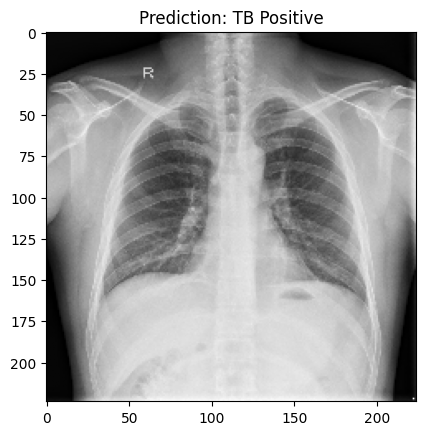

In [ ]:
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Correctly load image
    img = cv2.resize(img, (224, 224)) / 255.0
    img = img.reshape(1, 224, 224, 1)  # Reshape for model input

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)

    labels = {0: "Normal", 1: "TB Positive"}

    plt.imshow(img.squeeze(), cmap='gray')  # Display the processed image
    plt.title(f"Prediction: {labels[class_idx]}")
    plt.show()

# Example Usage
# Use a valid image path
image_path = "/content/drive/MyDrive/image/1000.png"  # Assuming '1000.png' is an image file
predict_image(image_path)